In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the train and test data
df=pd.read_excel(r"E:\Datasets\restaurant_food_cost\Data_Train.xlsx")
df_test=pd.read_excel(r"E:\Datasets\restaurant_food_cost\Data_Test.xlsx")

In [3]:
#Displaying the train data
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


Observation: The training dataset has 12690 rows and 9 columns

In [4]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


Observation: The testing dataset has 4231 rows and 8 attributes.

In [5]:
#Checking the information about the train dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


Observation: 
1. Only attributes RESTAURANT_ID and COST are of integer datatype. Rest of the attributes are of object datatype.
2. The attribute RATING and VOTES can be converted into integer datatypes so as smoothen the process of further data analysis.
3. Also, CITY and LOCALITY columns are of similar in nature. Joining these two columns will make these columns redundant, thereby, dropping the CITY AND LOCALITY columns and creating a new column LOCATION.

In [6]:
#Checking the name of train attributes.
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [7]:
# Checking the datatype of train dataset.
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [8]:
#CITY and LOCALITY columns are of similar in nature. Joining these two columns will make these columns redundant, thereby, dropping the CITY AND LOCALITY columns and creating a new column LOCATION.
df['LOCATION']=df['CITY']+' '+df['LOCALITY']
df.drop(columns=['CITY','LOCALITY'], axis=1, inplace=True)
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,LOCATION
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49 votes,1200,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30 votes,1500,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221 votes,800,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24 votes,800,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165 votes,300,Mumbai Lower Parel
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",3.8,546 votes,500,Hyderabad Gachibowli
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",4.3,1214 votes,1800,Mumbai Bandra Kurla Complex
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),4.0,608 votes,1300,Navi Mumbai Vashi
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),3.5,32 votes,400,Chennai Maduravoyal


In [9]:
# Checking unique entries in each of the column of train dataset.
df.nunique().to_frame().transpose()

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,LOCATION
0,113,11892,4155,2689,32,1847,86,1650


In [10]:
# Checking for null values in train dataset
df.isnull().values.any()

True

In [11]:
# Checking null values column wise
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
RATING              2
VOTES            1204
COST                0
LOCATION          113
dtype: int64

Observation:
1. There are 2 missing values in RATING column, 1204 missing values in VOTES column and 113 missing values in LOCATION column.
2. Filling RATING column with mode.
3. Filling missing column in LOCATION column as Missing.
4. As no. of missing values in VOTES column is huge. Therefore, filling missing value in this column with mode.

In [12]:
df['LOCATION'].fillna('Missing', inplace=True)

In [13]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df['RATING']=imp.fit_transform(df['RATING'].values.reshape(-1,1))

In [14]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df['VOTES']=imp.fit_transform(df['VOTES'].values.reshape(-1,1))

In [15]:
# Checking null values column wise
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
RATING           0
VOTES            0
COST             0
LOCATION         0
dtype: int64

In [16]:
#Converting Rating column into float datatype in train dataset.
df['RATING'] = df['RATING'].str.replace('NEW', '1')
df['RATING'] = df['RATING'].str.replace('-', '1').astype(float)
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,LOCATION
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49 votes,1200,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30 votes,1500,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221 votes,800,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24 votes,800,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165 votes,300,Mumbai Lower Parel
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",3.8,546 votes,500,Hyderabad Gachibowli
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",4.3,1214 votes,1800,Mumbai Bandra Kurla Complex
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),4.0,608 votes,1300,Navi Mumbai Vashi
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),3.5,32 votes,400,Chennai Maduravoyal


In [17]:
#Converting VOTES column into float datatype in train dataset.
df['VOTES'] = df['VOTES'].str.replace(' votes', '').astype(float)

In [18]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,LOCATION
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49.0,1200,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30.0,1500,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221.0,800,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24.0,800,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165.0,300,Mumbai Lower Parel
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",3.8,546.0,500,Hyderabad Gachibowli
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",4.3,1214.0,1800,Mumbai Bandra Kurla Complex
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),4.0,608.0,1300,Navi Mumbai Vashi
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),3.5,32.0,400,Chennai Maduravoyal


In [19]:
#Again checking for datatypes of attributes in train dataset
df.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
RATING           float64
VOTES            float64
COST               int64
LOCATION          object
dtype: object

In [20]:
# Printing the object datatypes and their unique values train dataset.

for column in df.columns:
    if df[column].dtypes==object:
        print(str(column)+':'+str(df[column].unique()))
        print(df[column].value_counts())
        print('*************************************************************')
        print('\n')

TITLE:['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' 'DE

# Data Visualization

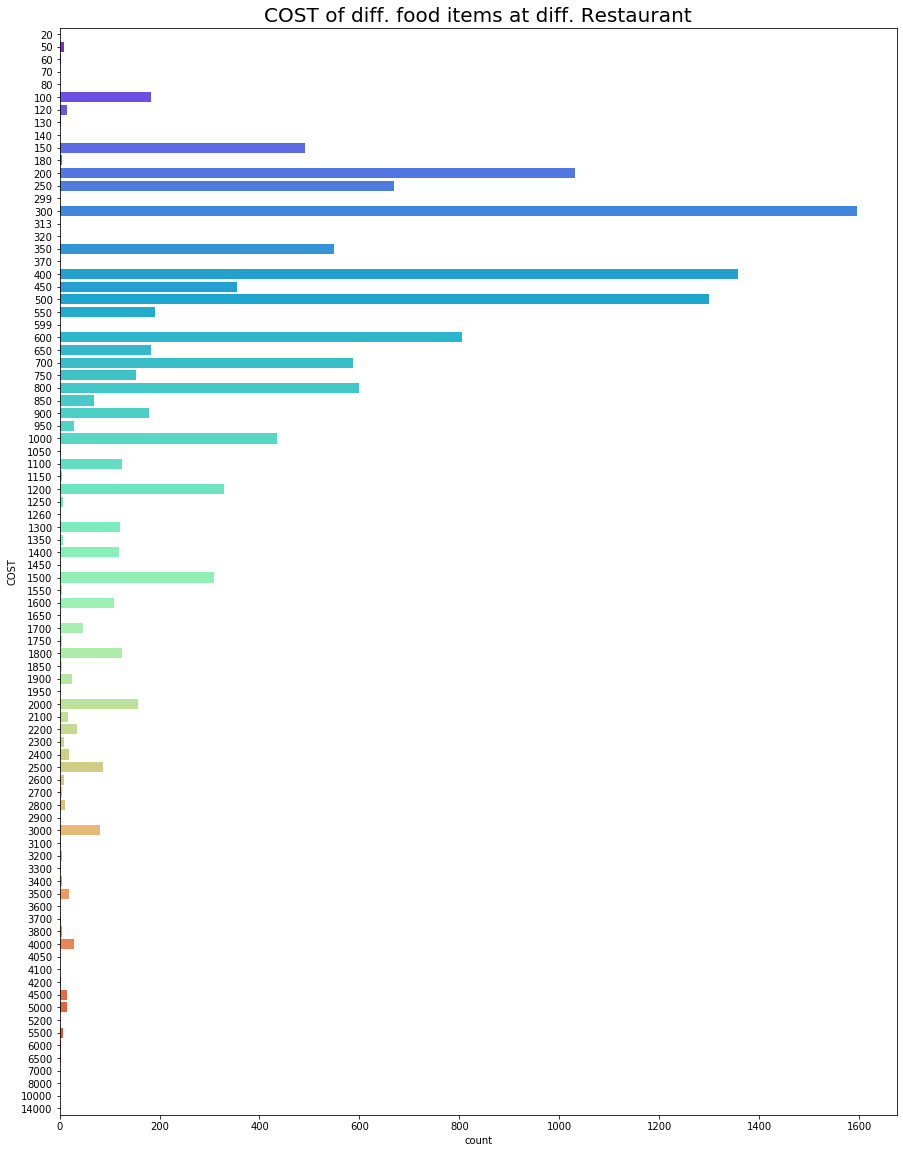

300      1595
400      1357
500      1300
200      1031
600       806
         ... 
4100        1
70          1
14000       1
1950        1
80          1
Name: COST, Length: 86, dtype: int64


In [21]:
# Checking the COST column in train dataset.
plt.figure(figsize=(15,20))
sns.countplot(y='COST',data=df,palette='rainbow')
plt.title('COST of diff. food items at diff. Restaurant',fontsize=20)
plt.yticks(rotation='horizontal')
plt.show()

print(df['COST'].value_counts())

Observation:
1. Many restaurants charge food cost ranging between 100 to 1500. With 300 being the maximum.
2. very few restaurants charge food cost above 3000.

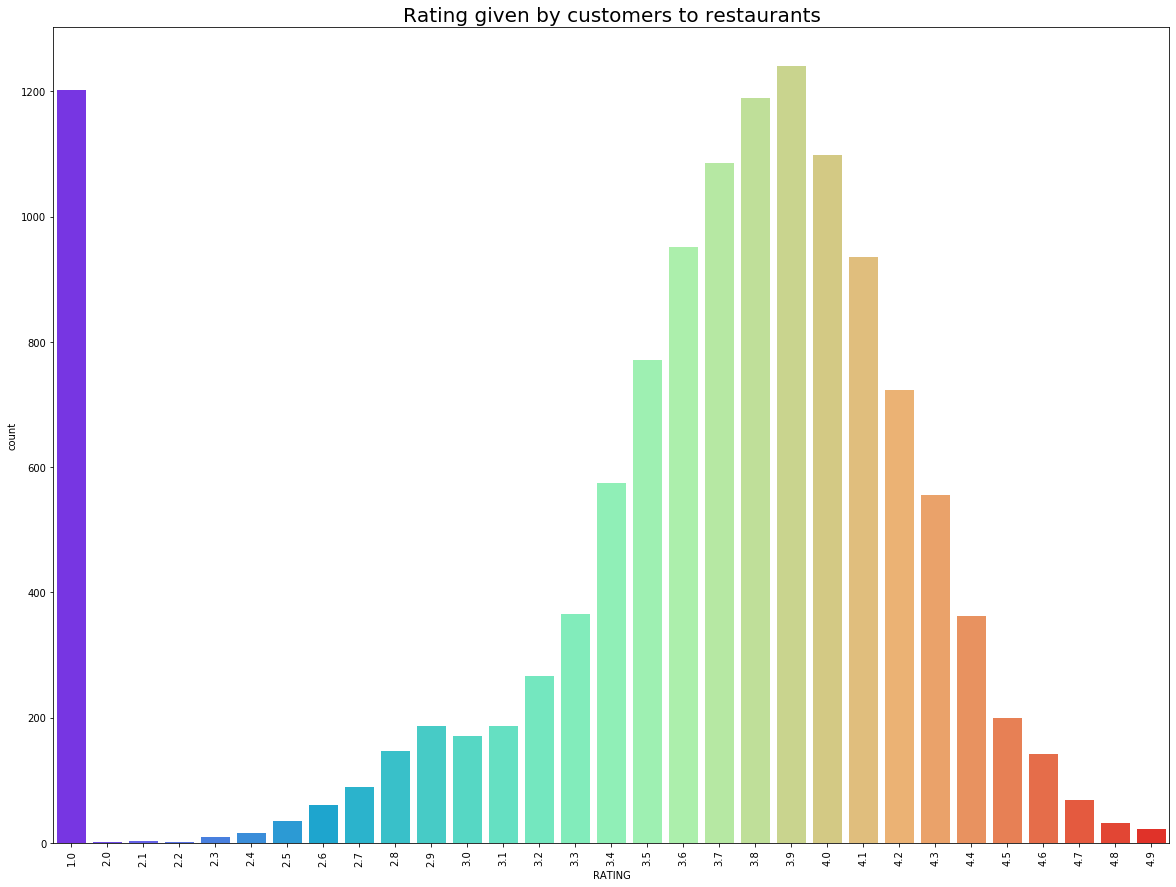

3.9    1240
1.0    1202
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
3.4     575
4.3     556
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64


In [22]:
# Checking the RATING column in train dataset.
plt.figure(figsize=(20,15))
sns.countplot(x='RATING',data=df,palette='rainbow')
plt.title('Rating given by customers to restaurants',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

print(df['RATING'].value_counts())

Observation: It seems that customers are satisfied with the service of restaurants as they give maximum ratings ranging between 3.4 to 4.4

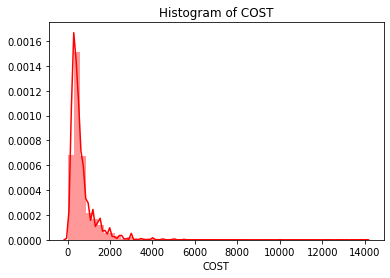

In [23]:
# Histogram of COST column.
sns.distplot(df['COST'],color='r')
plt.title('Histogram of COST')
plt.show()

# Converting categorical data into numeric variables.

In [24]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,LOCATION
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49.0,1200,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30.0,1500,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221.0,800,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24.0,800,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165.0,300,Mumbai Lower Parel
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",3.8,546.0,500,Hyderabad Gachibowli
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",4.3,1214.0,1800,Mumbai Bandra Kurla Complex
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),4.0,608.0,1300,Navi Mumbai Vashi
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),3.5,32.0,400,Chennai Maduravoyal


In [25]:
# Converting categorical column into numerical column using Label Encoder in train dataset.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['TITLE','CUISINES','TIME','LOCATION']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [26]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,LOCATION
0,31,9438,2627,739,3.6,49.0,1200,1588
1,33,13198,289,1885,4.2,30.0,1500,397
2,31,10915,2976,661,3.8,221.0,800,402
3,95,6346,4130,275,4.1,24.0,800,1035
4,50,15387,1766,615,3.8,165.0,300,1093
...,...,...,...,...,...,...,...,...
12685,95,13228,2934,1144,3.8,546.0,500,695
12686,33,9686,2143,1177,4.3,1214.0,1800,1034
12687,71,11133,2088,1137,4.0,608.0,1300,1193
12688,31,6134,3506,1837,3.5,32.0,400,336


In [27]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
RATING           0
VOTES            0
COST             0
LOCATION         0
dtype: int64

# Model Buiding

In [28]:
#Splitting the data into input and output variable.
x=df.drop(columns=['COST'],axis=1)
x.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,LOCATION
0,31,9438,2627,739,3.6,49.0,1588
1,33,13198,289,1885,4.2,30.0,397
2,31,10915,2976,661,3.8,221.0,402
3,95,6346,4130,275,4.1,24.0,1035
4,50,15387,1766,615,3.8,165.0,1093


In [29]:
y=df['COST']
y.head()

0    1200
1    1500
2     800
3     800
4     300
Name: COST, dtype: int64

In [30]:
#Checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(12690, 7) 		 (12690,)


In [31]:
# Scaling the input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [32]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [33]:
# Checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(9517, 7) 		 (3173, 7)


In [34]:
# Checking the shape
print(y_train.shape,'\t\t',y_test.shape)

(9517,) 		 (3173,)


In [35]:
# Importing Models Library
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing Error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [36]:
# Using algorithms via for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m, 'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('**************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.15179583802998697
Error:
Mean absolute error: 329.21353288022516
Mean squared error: 293095.4656479053
Root Mean Squared Error: 541.3829196122697
r2_score: 0.1710082517331818
**************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 1.0
Error:
Mean absolute error: 260.5902930980145
Mean squared error: 208658.29467381028
Root Mean Squared Error: 456.79130319415043
r2_score: 0.4098304997327715
*****************************************************

In [37]:
# Cross validating the models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print('Score of',m,'is:')
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard deviation:',score.std())
    print('*************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is:
Score: [0.1403299  0.15793185 0.11573312 0.17706257]
Mean Score: 0.14776436057919298
Standard deviation: 0.022599967857301208
*************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is:
Score: [0.54088423 0.52974157 0.32577522 0.56804948]
Mean Score: 0.4911126261863104
Standard deviation: 0.096469092688298
*************************************************************************************************


Score of KNeighborsRegressor(algorithm='auto'

# RandomForestRegressor is giving the best r2 score of 0.72, score of 0.96, and mean score of 0.71. Also, it is not suffering from over-fitting and under-fitting. So choosing RandomForestRegressor as our final model.

In [39]:
#Finding out the best parameters in RandomForest using GridSearchCV.
#parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
#RFR=RandomForestRegressor()

#clf=GridSearchCV(RFR,parameters)
#clf.fit(x,y)
#print(clf.best_params_)

In [41]:
# Using RandomForestRegressor wiith its best parameters

rf=RandomForestRegressor(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=None)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score",r2_score(y_test,y_pred))
print('\n')

Score: 0.9607588481273936


Mean Absolute Error: 186.08786006933502
Mean Squared Error 103246.39287002834
Root Mean Squared Error: 321.31976731914324


r2_score 0.7079777145703542




In [42]:
#Saving the model

#Importing joblib
from sklearn.externals import joblib

#saving the model as an object in a file
joblib.dump(rf,'restaurant_food_cost_prediction_rf.obj')

['restaurant_food_cost_prediction_rf.obj']

# Test Data

Repeating the analysis and preprocessing part on Test Data as done on Train data to make predictions.

In [43]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [44]:
#CITY and LOCALITY columns are of similar in nature. Joining these two columns will make these columns redundant, thereby, dropping the CITY AND LOCALITY columns and creating a new column LOCATION.
df_test['LOCATION']=df_test['CITY']+' '+df_test['LOCALITY']
df_test.drop(columns=['CITY','LOCALITY'], axis=1, inplace=True)
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,LOCATION
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),4.3,564 votes,Noida Sector 18
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),4.2,61 votes,Mumbai Grant Road
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),3.8,350 votes,Mumbai Marine Lines
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",3.8,1445 votes,Faridabad NIT
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),3.6,23 votes,Kochi Kaloor
...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),3.9,287 votes,New Delhi Punjabi Bagh
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),4.3,469 votes,Bangalore HSR Layout
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),3.7,53 votes,Faridabad Sector 86
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",-,NaN,Kochi Kochi


In [46]:
# Checking for null values in test dataset
df_test.isnull().values.any()

True

In [47]:
# Checking null values column wise
df_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
RATING             2
VOTES            402
LOCATION          35
dtype: int64

In [48]:
df_test['LOCATION'].fillna('Missing', inplace=True)

In [49]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df_test['RATING']=imp.fit_transform(df_test['RATING'].values.reshape(-1,1))

In [50]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df_test['VOTES']=imp.fit_transform(df_test['VOTES'].values.reshape(-1,1))

In [51]:
# Checking null values column wise
df_test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
RATING           0
VOTES            0
LOCATION         0
dtype: int64

In [52]:
#Converting Rating column into float datatype in test dataset.
df_test['RATING'] = df_test['RATING'].str.replace('NEW', '1')
df_test['RATING'] = df_test['RATING'].str.replace('-', '1').astype(float)
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,LOCATION
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),4.3,564 votes,Noida Sector 18
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),4.2,61 votes,Mumbai Grant Road
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),3.8,350 votes,Mumbai Marine Lines
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",3.8,1445 votes,Faridabad NIT
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),3.6,23 votes,Kochi Kaloor
...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),3.9,287 votes,New Delhi Punjabi Bagh
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),4.3,469 votes,Bangalore HSR Layout
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),3.7,53 votes,Faridabad Sector 86
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",1.0,6 votes,Kochi Kochi


In [54]:
#Converting VOTES column into float datatype in train dataset.
df_test['VOTES'] = df_test['VOTES'].str.replace(' votes', '').astype(float)

In [55]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,LOCATION
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),4.3,564.0,Noida Sector 18
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),4.2,61.0,Mumbai Grant Road
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),3.8,350.0,Mumbai Marine Lines
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",3.8,1445.0,Faridabad NIT
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),3.6,23.0,Kochi Kaloor
...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),3.9,287.0,New Delhi Punjabi Bagh
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),4.3,469.0,Bangalore HSR Layout
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),3.7,53.0,Faridabad Sector 86
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",1.0,6.0,Kochi Kochi


In [56]:
#Checking for datatypes of attributes in test dataset
df_test.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
RATING           float64
VOTES            float64
LOCATION          object
dtype: object

In [57]:
# Converting categorical column into numerical column using Label Encoder in train dataset.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['TITLE','CUISINES','TIME','LOCATION']
for val in list1:
    df_test[val]=le.fit_transform(df_test[val].astype(str))

In [58]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,LOCATION
0,23,4085,1293,503,4.3,564.0,834
1,75,12680,1632,933,4.2,61.0,599
2,23,1411,1455,219,3.8,350.0,618
3,66,204,208,1071,3.8,1445.0,279
4,75,13453,1637,208,3.6,23.0,506
...,...,...,...,...,...,...,...
4226,23,9057,1425,103,3.9,287.0,788
4227,66,1247,267,262,4.3,469.0,43
4228,75,8617,679,1052,3.7,53.0,289
4229,75,6485,1541,215,1.0,6.0,507


In [59]:
df_test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
RATING           0
VOTES            0
LOCATION         0
dtype: int64

In [60]:
# Loading the model
rf_from_joblib=joblib.load('restaurant_food_cost_prediction_rf.obj')

In [61]:
# Scaling the input variables of test data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(df_test)

In [62]:
# using the loaded model to make predictions

prediction=rf_from_joblib.predict(df_test)
prediction

array([510., 510., 510., ..., 510., 473., 510.])

In [63]:
res = pd.DataFrame(prediction)

res.columns = ["prediction"]
res.to_csv("restaurant_food_cost_prediction_rf.csv")